This is a R notebook demonstarting how diiferent boosted ML algorithms work
The algos used are Gradient Boosted Machine(GBM) and XGBoost

In [11]:
#install the packages
install.packages("PerformanceAnalytics",repos = "http://cran.us.r-project.org")
install.packages("gbm",dependencies = TRUE,repos = "http://cran.us.r-project.org")
install.packages("AUC",dependencies = TRUE,repos = "http://cran.us.r-project.org")
install.packages("pROC",dependencies = TRUE,repos = "http://cran.us.r-project.org")
install.packages("microbenchmark",dependencies = TRUE,repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/babai/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\babai\AppData\Local\Temp\RtmpWqQGGT\downloaded_packages


Installing package into 'C:/Users/babai/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\babai\AppData\Local\Temp\RtmpWqQGGT\downloaded_packages


Installing package into 'C:/Users/babai/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'AUC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\babai\AppData\Local\Temp\RtmpWqQGGT\downloaded_packages


Installing package into 'C:/Users/babai/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\babai\AppData\Local\Temp\RtmpWqQGGT\downloaded_packages


Installing package into 'C:/Users/babai/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'microbenchmark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\babai\AppData\Local\Temp\RtmpWqQGGT\downloaded_packages


In [13]:
#load the packages
library(PerformanceAnalytics,quietly = TRUE)
library(gbm,quietly = TRUE)
library(AUC,quietly = TRUE)
library(pROC, quietly=TRUE)
library(microbenchmark, quietly=TRUE)

Load the dataset

In [ ]:
set.seed(42)
setwd("C:/softwares/R Programs/Data Science concepts")
data<-read.csv("creditcard.csv",header = TRUE,na.strings = c(" ",""))

In [15]:
str(data)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

Prepare the train and test dataset

In [16]:
train.test.split <- sample(2, nrow(data), replace = TRUE , prob = c(0.7, 0.3))
train = data[train.test.split == 1,]
test = data[train.test.split == 2,]

################Fitting a GBM MODEL now ##############

In [20]:
gbm_model <- gbm(Class ~ .
                 , distribution = "bernoulli"
                 , data = rbind(train, test)
                 , n.trees = 500
                 , interaction.depth = 3
                 , n.minobsinnode = 100
                 , shrinkage = 0.01
                 , bag.fraction = 0.5
                 , train.fraction = nrow(train) / (nrow(train) + nrow(test))
)
print(gbm_model)

gbm(formula = Class ~ ., distribution = "bernoulli", data = rbind(train, 
    test), n.trees = 500, interaction.depth = 3, n.minobsinnode = 100, 
    shrinkage = 0.01, bag.fraction = 0.5, train.fraction = nrow(train)/(nrow(train) + 
        nrow(test)))
A gradient boosted model with bernoulli loss function.
500 iterations were performed.
The best test-set iteration was 500.
There were 30 predictors of which 22 had non-zero influence.


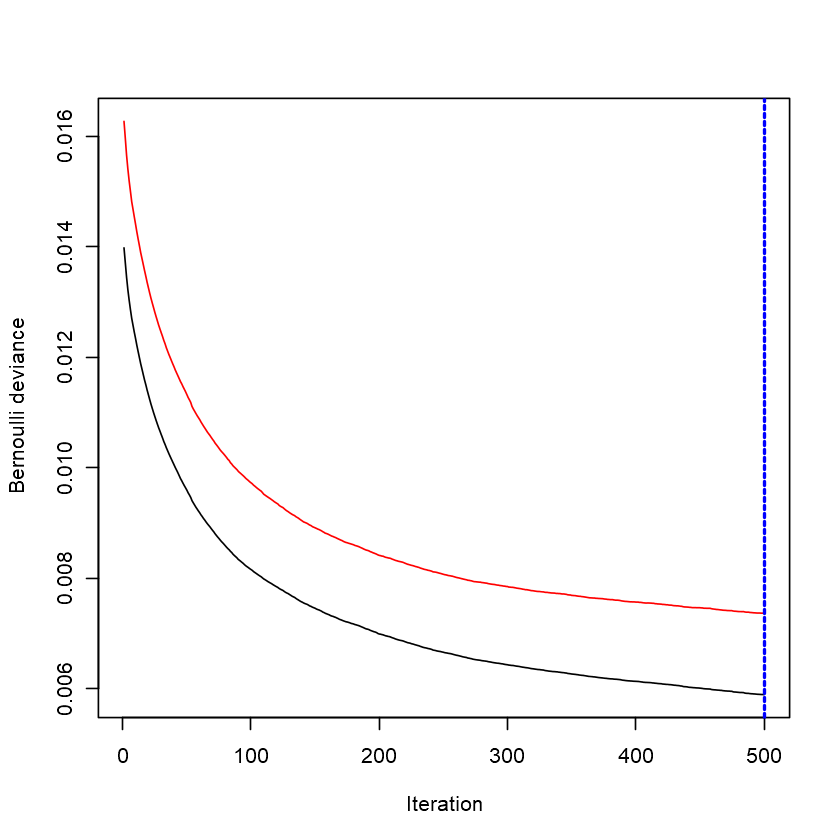

In [21]:
# Determine best iteration based on test data
best_iter = gbm.perf(gbm_model, method = "test")

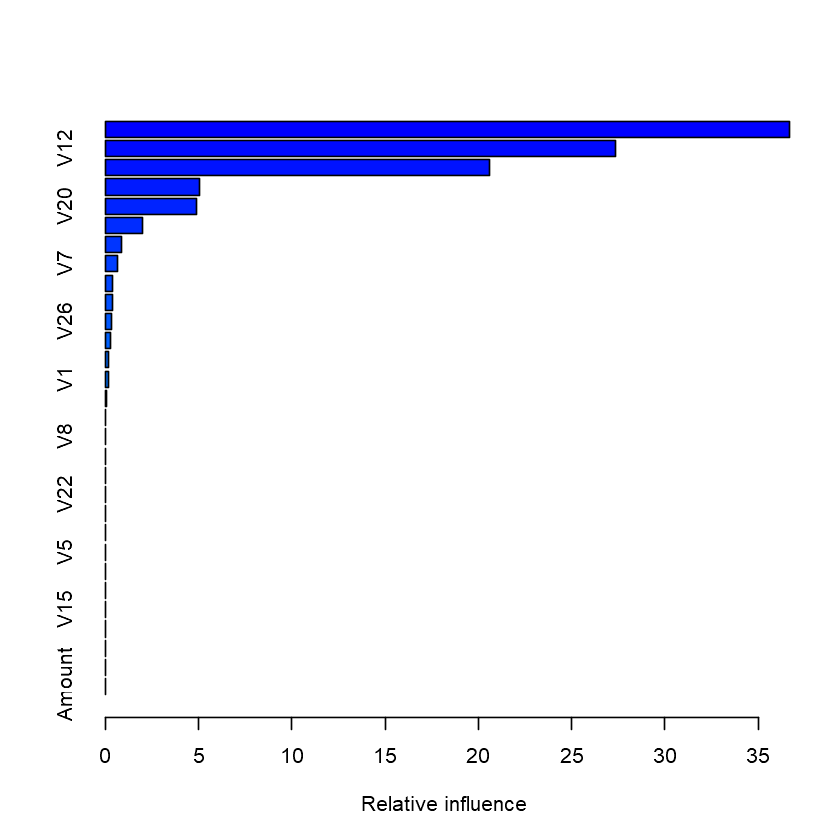

In [22]:
# Get feature importance
gbm_feature_imp = summary(gbm_model, n.trees = best_iter)

In [23]:
#fit the model to predict
prediction_gbm <- predict.gbm(object = gbm_model, 
                              newdata = test,                                                             
                              type = "response",
                              n.trees =best_iter)

Print the AUC


Call:
roc.default(response = test$Class, predictor = prediction_gbm,     plot = TRUE, col = "red")

Data: prediction_gbm in 85504 controls (test$Class 0) < 164 cases (test$Class 1).
Area under the curve: 0.9498


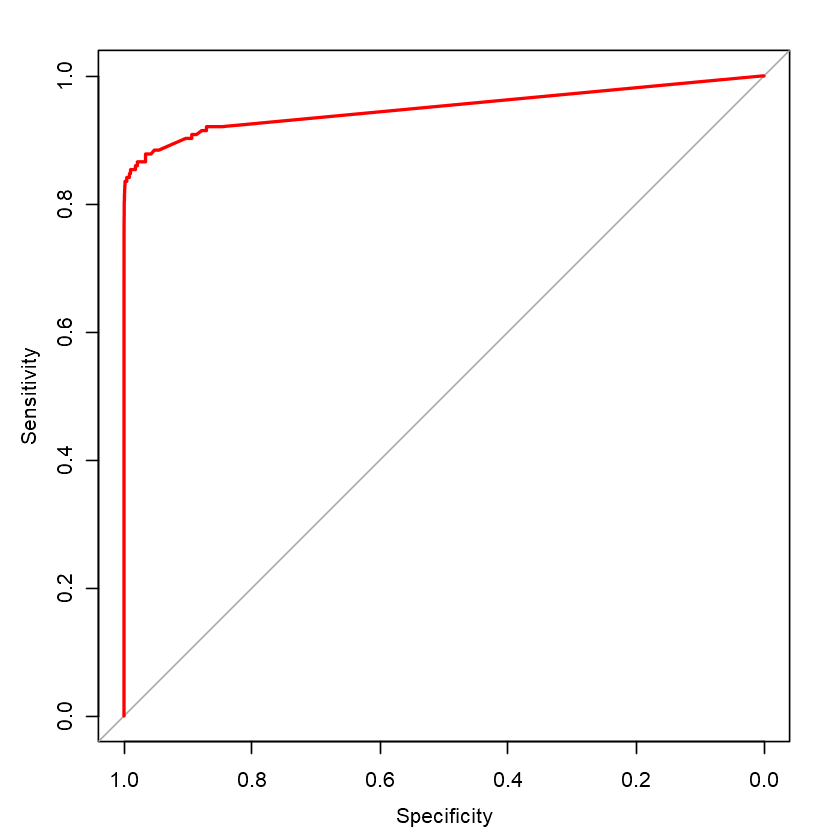

In [30]:
auc_gbm = roc(test$Class, prediction_gbm, plot = TRUE, col = "red")
print(auc_gbm)

Now we are going for a XGBoost model 
First we are going for a model which is tuned for speed and next we will tune the model for more accuracay

In [31]:
install.packages("xgboost",dependencies = TRUE,repos = "http://cran.us.r-project.org")
library(xgboost,quietly = TRUE)

Installing package into 'C:/Users/babai/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'xgboost' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\babai\AppData\Local\Temp\RtmpWqQGGT\downloaded_packages


Warning message:
"package 'xgboost' was built under R version 3.5.2"
Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [32]:
#prepare the train and test data sets
xgb_data_train <- xgb.DMatrix(as.matrix(train[, colnames(train) != "Class"]), label = train$Class)
xgb_data_test <- xgb.DMatrix(as.matrix(test[, colnames(test) != "Class"]), label = test$Class)


In [35]:
# Get the time to train the xgboost model
xgb_bench_speed = microbenchmark(
  xgb_model_speed <- xgb.train(data = xgb_data_train
                               , params = list(objective = "binary:logistic"
                                               , eta = 0.1
                                               , max.depth = 3
                                               , min_child_weight = 100
                                               , subsample = 1
                                               , colsample_bytree = 1
                                               , nthread = 3
                                               , eval_metric = "auc"
                               )
                               , watchlist = list(test = xgb_data_test)
                               , nrounds = 500
                               , early_stopping_rounds = 40
                               , print_every_n = 20
  )
  , times = 5L
)  
print(xgb_bench_speed)
print(xgb_model_speed$bestScore)

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.943909 
[41]	test-auc:0.943850 
[61]	test-auc:0.958839 
[81]	test-auc:0.960277 
[101]	test-auc:0.960277 
Stopping. Best iteration:
[75]	test-auc:0.962100

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.943909 
[41]	test-auc:0.943850 
[61]	test-auc:0.958839 
[81]	test-auc:0.960277 
[101]	test-auc:0.960277 
Stopping. Best iteration:
[75]	test-auc:0.962100

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.943909 
[41]	test-auc:0.943850 
[61]	test-auc:0.958839 
[81]	test-auc:0.960277 
[101]	test-auc:0.960277 
Stopping. Best iteration:
[75]	test-auc:0.962100

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.943909 
[41]	test-auc:0.943850 
[61]	test-auc:0.958839 
[81]	test-auc:0.960277 
[101]	test-auc:0.960277 
Stopping. Best iteration:
[75]	test-auc:0.9621


Call:
roc.default(response = test$Class, predictor = xgb_test_speed,     plot = TRUE, col = "blue")

Data: xgb_test_speed in 85504 controls (test$Class 0) < 164 cases (test$Class 1).
Area under the curve: 0.9621


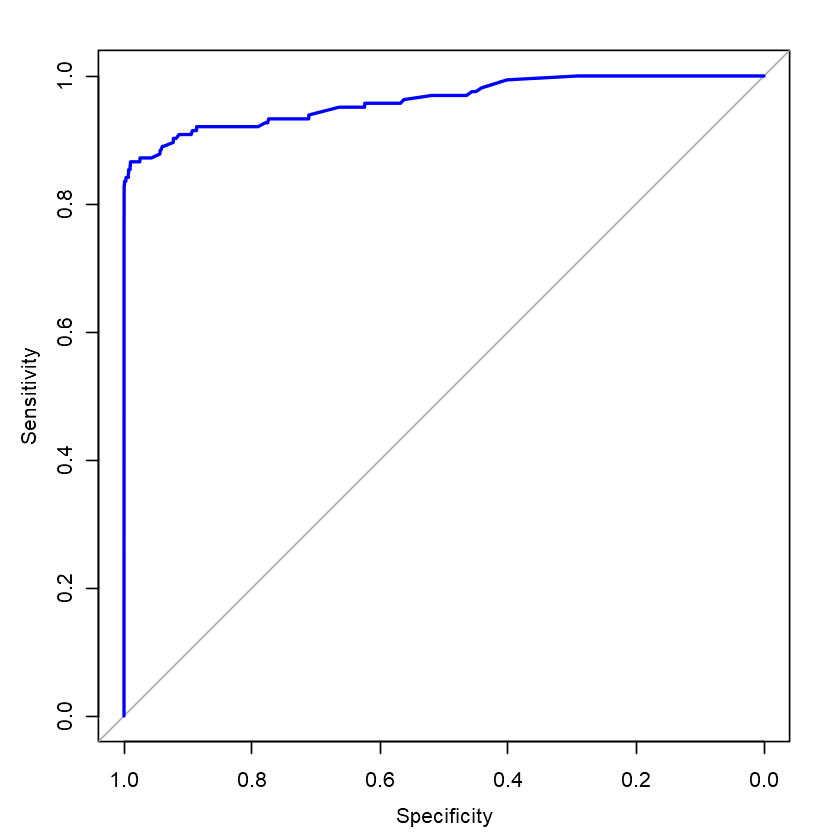

In [36]:
# Make predictions on test set for ROC curve
xgb_test_speed = predict(xgb_model_speed
                         , newdata = as.matrix(test[, colnames(test) != "Class"])
                         , ntreelimit = xgb_model_speed$bestInd)
auc_xgb_speed = roc(test$Class, xgb_test_speed, plot = TRUE, col = "blue")
print(auc_xgb_speed)

So the AUC has improved fromm GBM to Xgboost from 0.9498 to 0.9621
Next we will attempt another XGboost tuned for more accuracy The max.depth is increased to 7 from 3

In [37]:
xgb_bench_accc = microbenchmark(
  xgb_model_acc <- xgb.train(data = xgb_data_train
                               , params = list(objective = "binary:logistic"
                                               , eta = 0.1
                                               , max.depth = 7
                                               , min_child_weight = 100
                                               , subsample = 1
                                               , colsample_bytree = 1
                                               , nthread = 3
                                               , eval_metric = "auc"
                               )
                               , watchlist = list(test = xgb_data_test)
                               , nrounds = 500
                               , early_stopping_rounds = 40
                               , print_every_n = 20
  )
  , times = 5L
)                                                   
print(xgb_bench_accc)
print(xgb_model_acc$bestScore)

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.944424 
[41]	test-auc:0.944060 
[61]	test-auc:0.961498 
[81]	test-auc:0.961751 
[101]	test-auc:0.961751 
Stopping. Best iteration:
[69]	test-auc:0.962970

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.944424 
[41]	test-auc:0.944060 
[61]	test-auc:0.961498 
[81]	test-auc:0.961751 
[101]	test-auc:0.961751 
Stopping. Best iteration:
[69]	test-auc:0.962970

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.944424 
[41]	test-auc:0.944060 
[61]	test-auc:0.961498 
[81]	test-auc:0.961751 
[101]	test-auc:0.961751 
Stopping. Best iteration:
[69]	test-auc:0.962970

[1]	test-auc:0.917094 
Will train until test_auc hasn't improved in 40 rounds.

[21]	test-auc:0.944424 
[41]	test-auc:0.944060 
[61]	test-auc:0.961498 
[81]	test-auc:0.961751 
[101]	test-auc:0.961751 
Stopping. Best iteration:
[69]	test-auc:0.9629

The AUC has increased to 0.96297

   Feature         Gain        Cover  Frequency
1:     V14 4.438909e-01 0.3550438060 0.36686391
2:     V10 2.470014e-01 0.1919625088 0.15976331
3:     V17 1.507224e-01 0.3051937220 0.10059172
4:     V12 8.798310e-02 0.0654771123 0.04733728
5:      V4 6.815034e-02 0.0493768360 0.27218935
6:      V3 2.113415e-03 0.0009815070 0.03550296
7:     V11 1.203029e-04 0.0002703178 0.00591716
8:      V9 1.819931e-05 0.0316941900 0.01183432

Call:
roc.default(response = test$Class, predictor = xgb_test_acc,     plot = TRUE, col = "blue")

Data: xgb_test_acc in 85504 controls (test$Class 0) < 164 cases (test$Class 1).
Area under the curve: 0.963


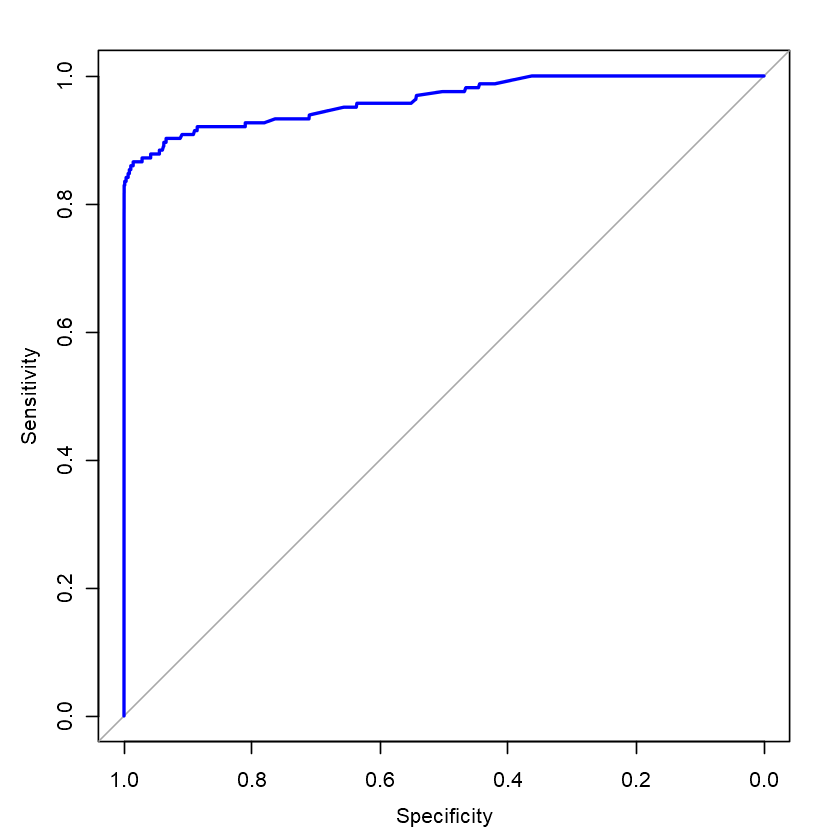

In [38]:
#Get feature importance
xgb_feature_imp = xgb.importance(model = xgb_model_acc)
print(xgb_feature_imp)
# Make predictions on test set for ROC curve
xgb_test_acc = predict(xgb_model_acc
                       , newdata = as.matrix(test[, colnames(test) != "Class"])
                       , ntreelimit = xgb_model_acc$bestInd)
auc_xgb_acc = roc(test$Class, xgb_test_acc, plot = TRUE, col = "blue")
print(auc_xgb_acc)